In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import folium


In [165]:
# Carga el conjunto de datos desde el archivo CSV
df = pd.read_csv('terremotos_españa.csv', delimiter=';')
df

,Evento,Fecha,Hora,Latitud,Longitud,Prof. (Km),Inten.,Mag.,Tipo Mag.,Localización
0,es2020aaaoe,01/01/2020,00:16:29,28.1426,-16.6635,9.0,,1.1,4,SW VILAFLOR DE CHASNA.ITF
1,es2020aalxb,01/01/2020,06:00:14,28.0513,-16.2104,4.0,,1.2,4,ATLÁNTICO-CANARIAS
2,es2020aasdq,01/01/2020,09:09:46,36.9558,-2.3569,1.0,IV,3.7,5,NE PECHINA.AL
3,es2020aawsw,01/01/2020,11:28:44,28.0290,-15.9617,35.0,,1.5,4,ATLÁNTICO-CANARIAS
4,es2020aayib,01/01/2020,12:16:45,42.9123,-3.0648,0.0,,1.2,4,SW BERBERANA.BU
...,...,...,...,...,...,...,...,...,...,...
50512,es2024arbhu,10/01/2024,07:55:06,27.5136,-17.3152,0.0,,2.4,4,ATLÁNTICO-CANARIAS
50513,es2024arbzf,10/01/2024,08:15:32,43.1030,-1.0914,0.0,,2.5,4,SE ST JEAN PIED DE PORT.FRA
50514,es2024arovx,10/01/2024,14:45:41,35.3620,-3.8168,0.0,,2.1,4,NE ALHUCEMAS.MAC
50515,es2024arqzd,10/01/2024,15:50:03,37.2346,-8.5438,17.0,,2.2,4,S MONCHIQUE.POR


In [166]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50517 entries, 0 to 50516
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0         Evento  50517 non-null  object 
 1          Fecha  50517 non-null  object 
 2           Hora  50517 non-null  object 
 3        Latitud  50517 non-null  float64
 4       Longitud  50517 non-null  float64
 5     Prof. (Km)  50517 non-null  float64
 6         Inten.  50517 non-null  object 
 7           Mag.  50517 non-null  float64
 8      Tipo Mag.  50517 non-null  int64  
 9   Localización  50517 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.9+ MB


,Latitud,Longitud,Prof. (Km),Mag.,Tipo Mag.
count,50517.000000,50517.000000,50517.000000,50517.000000,50517.000000
mean,34.578928,-8.552772,11.457226,1.908132,4.024922
std,5.131800,7.085155,10.866153,0.753675,0.271572
min,26.245500,-19.974300,0.000000,-0.500000,3.000000
25%,28.566200,-16.862800,3.000000,1.400000,4.000000
50%,35.513800,-4.286500,10.000000,1.900000,4.000000
75%,37.253800,-3.587000,15.000000,2.400000,4.000000
max,44.971300,5.996600,106.000000,6.800000,6.000000


In [167]:
print(df.nunique())
print(df.isnull().sum())

      Evento    50517
       Fecha     1471
        Hora    37766
     Latitud    24197
    Longitud    26156
  Prof. (Km)      462
      Inten.       11
        Mag.       62
   Tipo Mag.        4
Localización     5753
dtype: int64
      Evento    0
       Fecha    0
        Hora    0
     Latitud    0
    Longitud    0
  Prof. (Km)    0
      Inten.    0
        Mag.    0
   Tipo Mag.    0
Localización    0
dtype: int64


In [168]:
print(df.columns)
df.columns = df.columns.str.replace(' ','')
print(df.columns)

Index(['      Evento', '       Fecha', '        Hora', '     Latitud',
       '    Longitud', '  Prof. (Km)', '      Inten.', '        Mag.',
       '   Tipo Mag.', 'Localización'],
      dtype='object')
Index(['Evento', 'Fecha', 'Hora', 'Latitud', 'Longitud', 'Prof.(Km)', 'Inten.',
       'Mag.', 'TipoMag.', 'Localización'],
      dtype='object')


In [169]:
df = df.drop(['Evento','Inten.'], axis = 1)

In [170]:
print(df['Localización'].values)
print(df['Localización'].nunique())

['SW VILAFLOR DE CHASNA.ITF' 'ATLÁNTICO-CANARIAS' 'NE PECHINA.AL' ...
 'NE ALHUCEMAS.MAC' 'S MONCHIQUE.POR' 'ALBORÁN SUR']
5753


In [171]:
df['Localización'] = df['Localización'].apply(lambda x: ' '.join(re.findall(r'\b\w{4,}\b', x)))
print(df['Localización'].values)
print(df['Localización'].nunique())

['VILAFLOR CHASNA' 'ATLÁNTICO CANARIAS' 'PECHINA' ... 'ALHUCEMAS'
 'MONCHIQUE' 'ALBORÁN']
2412


In [172]:
df['Fecha'] = df['Fecha'].str.strip()
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Hora'] = df['Hora'].str.strip()
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50517 entries, 0 to 50516
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha         50517 non-null  datetime64[ns]
 1   Hora          50517 non-null  datetime64[ns]
 2   Latitud       50517 non-null  float64       
 3   Longitud      50517 non-null  float64       
 4   Prof.(Km)     50517 non-null  float64       
 5   Mag.          50517 non-null  float64       
 6   TipoMag.      50517 non-null  int64         
 7   Localización  50517 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 3.1+ MB


In [173]:
df['Dia_Semana'] = df['Fecha'].dt.day_name()
df['Mes'] = df['Fecha'].dt.month_name()
df['Año'] = df['Fecha'].dt.year
df['Hora'] = df['Hora'].dt.hour

In [174]:
df = df[['Fecha','Hora','Dia_Semana','Mes', 'Año','Latitud','Longitud','Prof.(Km)','Mag.','TipoMag.','Localización']]
df

,Fecha,Hora,Dia_Semana,Mes,Año,Latitud,Longitud,Prof.(Km),Mag.,TipoMag.,Localización
0,2020-01-01,0,Wednesday,January,2020,28.1426,-16.6635,9.0,1.1,4,VILAFLOR CHASNA
1,2020-01-01,6,Wednesday,January,2020,28.0513,-16.2104,4.0,1.2,4,ATLÁNTICO CANARIAS
2,2020-01-01,9,Wednesday,January,2020,36.9558,-2.3569,1.0,3.7,5,PECHINA
3,2020-01-01,11,Wednesday,January,2020,28.0290,-15.9617,35.0,1.5,4,ATLÁNTICO CANARIAS
4,2020-01-01,12,Wednesday,January,2020,42.9123,-3.0648,0.0,1.2,4,BERBERANA
...,...,...,...,...,...,...,...,...,...,...,...
50512,2024-01-10,7,Wednesday,January,2024,27.5136,-17.3152,0.0,2.4,4,ATLÁNTICO CANARIAS
50513,2024-01-10,8,Wednesday,January,2024,43.1030,-1.0914,0.0,2.5,4,JEAN PIED PORT
50514,2024-01-10,14,Wednesday,January,2024,35.3620,-3.8168,0.0,2.1,4,ALHUCEMAS
50515,2024-01-10,15,Wednesday,January,2024,37.2346,-8.5438,17.0,2.2,4,MONCHIQUE


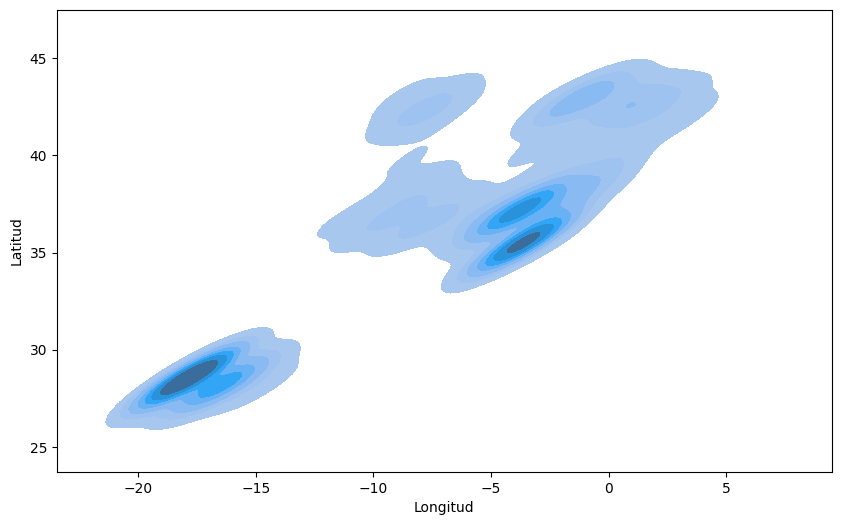

In [182]:
plt.figure(figsize=(10,6))
sns.kdeplot(x = df['Longitud'],
            y = df['Latitud'],
            fill = True, 
            n_levels = 8)
plt.show()

<Axes: xlabel='count', ylabel='Localización'>

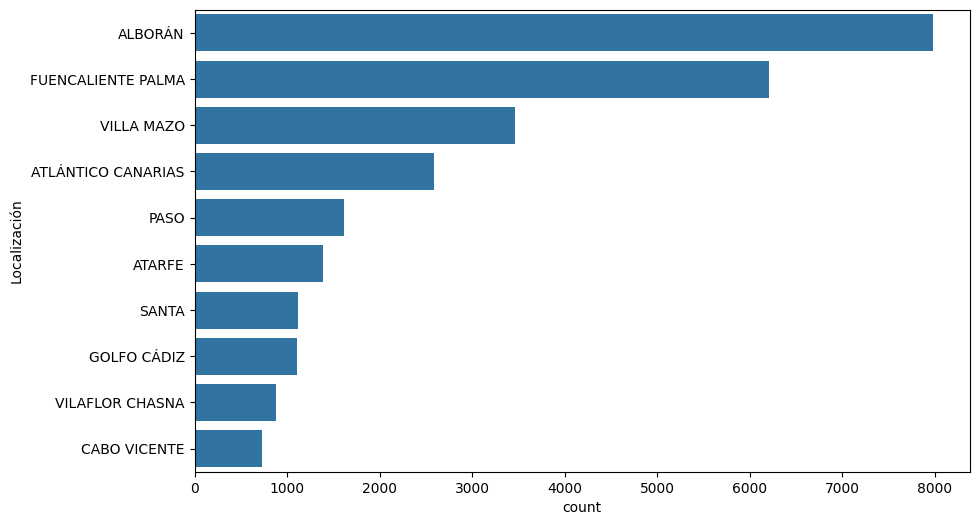

In [176]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Localización', order = df['Localización'].value_counts().index[:10])

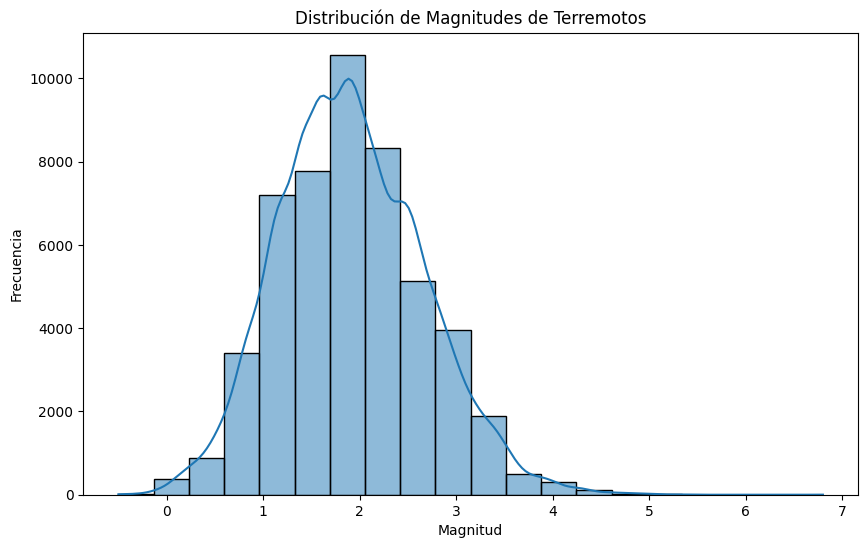

In [177]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mag.'], bins=20, kde=True)
plt.title('Distribución de Magnitudes de Terremotos')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.show()


<Axes: xlabel='Mes'>

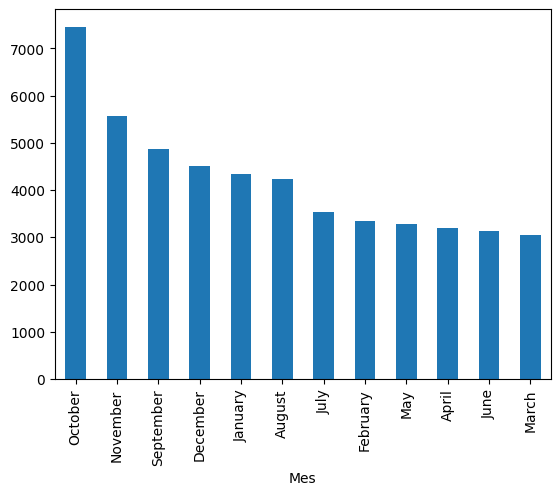

In [178]:
df['Mes'].value_counts().plot(kind='bar')

In [179]:
df_sorted = df.sort_values('Mag.', ascending=False).head(1000)
df_sorted

,Fecha,Hora,Dia_Semana,Mes,Año,Latitud,Longitud,Prof.(Km),Mag.,TipoMag.,Localización
47923,2023-09-08,22,Friday,September,2023,31.2044,-8.7582,25.0,6.8,5,MOROCCO
11769,2021-03-18,0,Thursday,March,2021,36.7884,5.4158,0.0,6.0,5,MEDITERRÁNEO ARGELIA
32379,2022-02-16,4,Wednesday,February,2022,32.2099,-16.8688,34.0,5.4,6,ATLÁNTICO MADEIRA
33296,2022-03-19,9,Saturday,March,2022,36.8355,5.3300,19.0,5.4,6,MEDITERRÁNEO ARGELIA
35151,2022-05-20,12,Friday,May,2022,35.4975,-3.6145,2.0,5.3,5,ALBORÁN
...,...,...,...,...,...,...,...,...,...,...,...
21159,2021-10-06,22,Wednesday,October,2021,28.5554,-17.8328,12.4,3.5,4,FUENCALIENTE PALMA
2282,2020-05-14,1,Thursday,May,2020,35.2446,-11.5923,45.0,3.5,6,CABO VICENTE
13630,2021-05-11,16,Tuesday,May,2021,36.8205,3.5280,12.0,3.5,6,BOUMERDAS
26953,2021-11-20,8,Saturday,November,2021,28.5598,-17.8508,9.3,3.5,4,FUENCALIENTE PALMA


In [180]:
# Creamos un mapa centrado en España con zoom igual a 6 
world_map = folium.Map(location = [35.4637, -3.7492], zoom_start = 5)

In [181]:
# Esto para añadir los puntos de los terremotos al mapa
for lat, lng in zip(df_sorted["Latitud"], df_sorted["Longitud"]):
    folium.CircleMarker(
        location=[lat, lng],
        radius=6,
        color="cyan",
        fill=True,
        fill_color="azul",
        fill_opacity=0.8
    ).add_to(world_map)

# Mostrar el mapa
world_map